In [6]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import csv

## ablation

In [9]:
df = pd.read_csv('runs/21/concat/bst/all/cornell_movie_dataset_all_concat.csv')
df['num_aave_fts'].value_counts()

0     8479
1     8068
2     4649
3     2434
4     1266
5      639
6      304
7      141
8       77
9       30
10      20
11      10
12       3
14       2
16       1
13       1
Name: num_aave_fts, dtype: int64

In [3]:
max_num_fts = 8
actual_col_name = ['gt_sent', 'gt_aave_sent', 'gen_sent', 'gen_aave_sent']

df = pd.read_csv('runs/21/concat/gpt3/cornell_movie_dataset_all_concat.csv', index_col=0)

for i in range(6, max_num_fts + 1):
    stats_df = df[df['num_aave_fts'] >= i][actual_col_name].apply(pd.Series.value_counts)
    df = df.sort_index()
    stats_df.to_csv(f'runs/21/stats/gpt3/cornell_movie/cornell_movie_dataset_all_stats_{i}_fts.csv')

In [53]:
df = pd.read_csv(f'runs/21/stats/dialogpt/all/cornell_movie/cornell_movie_dataset_all_stats_{2}_fts.csv', index_col=0)
df = df.sort_index()
df.iloc[0]

gt_sent          6681
gt_aave_sent     6500
gen_sent         5991
gen_aave_sent    6172
Name: NEGATIVE, dtype: int64

## stats and plot

In [105]:
file_name = 'cornell_movie_dataset_all_stats_2_fts.csv'
buffer = [file_name]
df = pd.read_csv('runs/21/stats/gpt3/all/cornell_movie/' + file_name, index_col=0)
df = df.sort_index()
num_samples = np.sum(df['gt_sent'])
df.iloc[0] = df.iloc[0] * -1
df.loc['score'] = np.sum(df)

sae_change = (df.loc['score']['gen_sent'] - df.loc['score']['gt_sent']) / df.loc['score']['gt_sent']
aave_change = (df.loc['score']['gen_aave_sent'] - df.loc['score']['gt_aave_sent']) / df.loc['score']['gt_aave_sent']
buffer.append(sae_change)
buffer.append(aave_change)

In [106]:
df

,gt_sent,gt_aave_sent,gen_sent,gen_aave_sent
NEGATIVE,-2197,-2115,-1755,-1697
POSITIVE,2245,2327,2687,2745
score,48,212,932,1048


In [107]:
buffer

['dailydialog_dataset_all_stats_2_fts.csv',
 18.416666666666668,
 3.943396226415094]

In [90]:
f = open('runs/21/final/gpt3/cornell_movie_all_final.csv', 'w', encoding='utf-8')
writer = csv.writer(f)
# writer.writerow(['num_fts', 'distilbert_sae_change', 'distilbert_aave_change', 'roberta_base_sae_change', 'roberta_base_aave_change','roberta_large_sae_change', 'roberta_large_aave_change'])
writer.writerow(['num_fts', 'sae_change', 'aave_change'])

dir_list = os.listdir('runs/21/stats/gpt3/cornell_movie')
dir_list.sort()

for file_name in dir_list:
    buffer = [file_name]
    df = pd.read_csv('runs/21/stats/gpt3/cornell_movie/' + file_name, index_col=0)
    df = df.sort_index()
    num_samples = np.sum(df['gt_sent'])
    df.iloc[0] = df.iloc[0] * -1
    df.loc['score'] = np.sum(df) / num_samples

    sae_change = (df.loc['score']['gen_sent'] - df.loc['score']['gt_sent']) / df.loc['score']['gt_sent']
    aave_change = (df.loc['score']['gen_aave_sent'] - df.loc['score']['gt_aave_sent']) / df.loc['score']['gt_aave_sent']
    buffer.append(sae_change)
    buffer.append(aave_change)
    writer.writerow(buffer)
    

f.close()

### dailydialog

<AxesSubplot:xlabel='num_fts'>

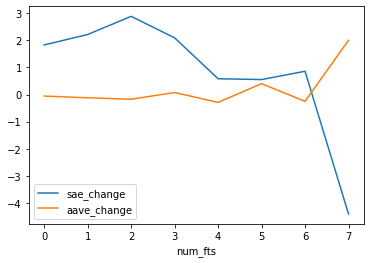

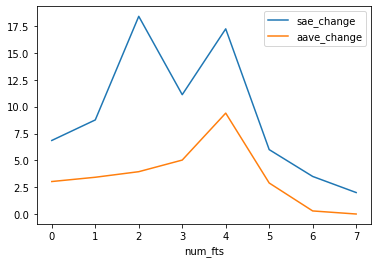

In [92]:
df = pd.read_csv('runs/21/final/dialogpt/all/dailydialog_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

df = pd.read_csv('runs/21/final/bst/all/dailydialog_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

### cornell movie

<AxesSubplot:xlabel='num_fts'>

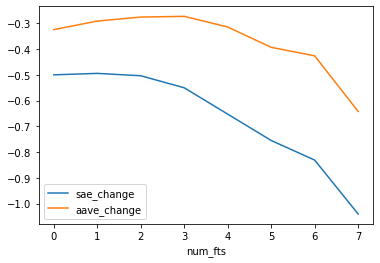

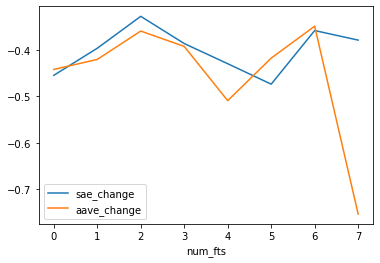

In [93]:
df = pd.read_csv('runs/21/final/dialogpt/all/cornell_movie_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

df = pd.read_csv('runs/21/final/bst/all/cornell_movie_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

### personachat

<AxesSubplot:xlabel='num_fts'>

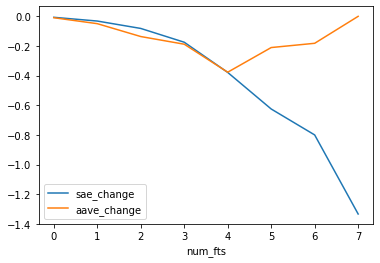

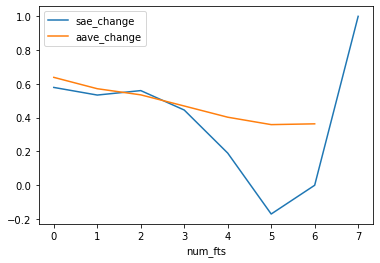

In [94]:
df = pd.read_csv('runs/21/final/dialogpt/all/personachat_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

df = pd.read_csv('runs/21/final/bst/all/personachat_all_final.csv')
df['num_fts'] = [0, 1, 2, 3, 4, 5, 6, 7]
df = df.set_index('num_fts', drop=True)
df[['sae_change', 'aave_change']].plot.line()

### absolute values

In [25]:
df = pd.read_csv('runs/17/stats/dialogpt_dailydialog/5fts_dialogpt_dailydialog.csv')
df.iloc[3] = df.iloc[3] * -1
df.iloc[0] = df.iloc[0] * -1
df.iloc[1] = df.iloc[1] * 0
df.loc['score'] = np.sum(df)

df

,Unnamed: 0,distilbert_history,distilbert_history_aave,distilbert_sae_gen,distilbert_aave_gen,distilbert_groundtruth,distilbert_groundtruth_aave,roberta_base_history,roberta_base_history_aave,roberta_base_sae_gen,roberta_base_aave_gen,roberta_base_groundtruth,roberta_base_groundtruth_aave,roberta_large_history,roberta_large_history_aave,roberta_large_sae_gen,roberta_large_aave_gen,roberta_large_groundtruth,roberta_large_groundtruth_aave
0,,NaN,NaN,NaN,NaN,NaN,NaN,-154.0,-180.0,-125.0,-118.0,-91.0,-92.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,LABEL_2,NaN,NaN,NaN,NaN,NaN,NaN,167.0,169.0,120.0,149.0,136.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN
3,,-344.0,-341.0,-273.0,-247.0,-347.0,-328.0,NaN,NaN,NaN,NaN,NaN,NaN,-270.0,-263.0,-268.0,-256.0,-267.0,-274.0
4,POSITIVE,200.0,203.0,271.0,297.0,197.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,274.0,281.0,276.0,288.0,277.0,270.0
score,LABEL_2POSITIVE,-144.0,-138.0,-2.0,50.0,-150.0,-112.0,13.0,-11.0,-5.0,31.0,45.0,51.0,4.0,18.0,8.0,32.0,10.0,-4.0
